 Check parameters tuning for increasing accuracy, model type and configuration, pros and cons of model is important. You will write about the ML model, pros and cons, dataset, optimisation options, functions used in model, performance metrics formulas.

#B1

Predict the price of Uber ride from a given pickup point to the agreed drop-off location.Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression model OR random forest regression model
5. Evaluate the model and display the scores like R2, RMSE.

Dataset: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
#We do not want to see warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/datasets/uber.csv")

In [ ]:
#Create a data copy
df = data.copy()

In [ ]:
#Print data
df.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
#Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
#pickup_datetime is not in required data format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [ ]:
#Statistics of data
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
#Number of missing values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
#Correlation
df.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000589,0.000230,-0.000341,0.000270,0.000271,0.002257
fare_amount,0.000589,1.000000,0.010457,-0.008481,0.008986,-0.011014,0.010150
pickup_longitude,0.000230,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.000341,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002257,0.010150,-0.000414,-0.001560,0.000033,-0.000659,1.000000


In [ ]:
#Drop the rows with missing values
df.dropna(inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7de92c56c4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7de92c56ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7de92c56c250>],
 'medians': [<matplotlib.lines.Line2D at 0x7de92c56cf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7de92c56d210>],
 'means': []}

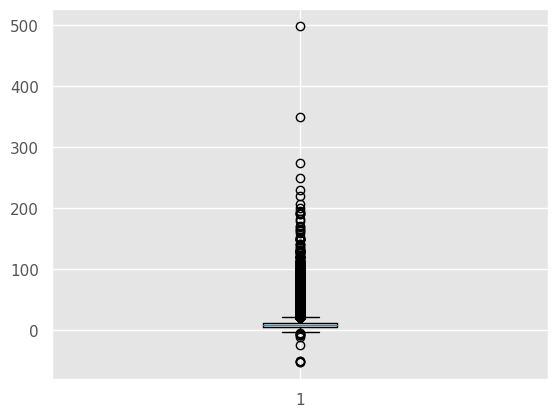

In [ ]:
plt.boxplot(df['fare_amount'])

In [ ]:
#Remove Outliers
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7de92c5ab280>,
 'caps': [<matplotlib.lines.Line2D at 0x7de92c5ab7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7de92c5aafe0>],
 'medians': [<matplotlib.lines.Line2D at 0x7de92c536470>],
 'fliers': [<matplotlib.lines.Line2D at 0x7de92c5ab8b0>],
 'means': []}

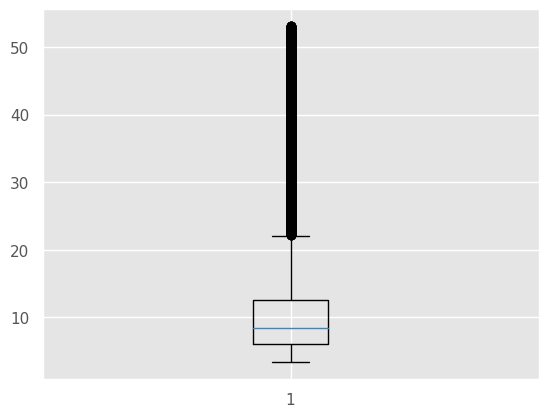

In [ ]:
plt.boxplot(df['fare_amount'])
#Here the graph shows all the outliers are removed

In [ ]:
#Check the missing values now
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
#Time to apply learning models
from sklearn.model_selection import train_test_split

In [ ]:
#Take x as predictor variable
x = df.drop("fare_amount", axis = 1)
#And y as target variable
y = df['fare_amount']

In [ ]:
x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))
x = x.loc[:, x.columns.str.contains('^Unnamed')]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Prediction
predict = lrmodel.predict(x_test)
#Here is the predicted fare price of Uber Rides using Linear Regression
print(predict)

[10.9555249  10.95231122 10.95241127 ... 10.95330031 10.95102493
 10.95402869]


In [ ]:
#Check Error
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predict, y_test))
print("RMSE error for linear regression model is: ", lrmodelrmse)

RMSE error for linear regression model is:  8.063863046328835


In [ ]:
#Check R2 score
from sklearn.metrics import r2_score
lrmodelr2 = r2_score(y_test, predict)
print("R2 score for linear regression model is: ", lrmodelr2)
#As the R2 value is negative and is not between 0 and 1, this model is worst fit for prediction(overfitting)

R2 score for linear regression model is:  -2.6395537326528995e-05


In [ ]:
#Checking the input id for price prediction of Uber Ride using Linear Regression

n = int(input('Enter id of the Uber Ride: '))
result = predict[n]
print("The predicted Price using Linear Regression is: ", result)

Enter id of the Uber Ride: 2
The predicted Price using Linear Regression is:  10.95241127449392


In [ ]:
#Let's Apply Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)

In [ ]:
#Fit the Forest
rfrmodel.fit(x_train, y_train)
rfrmodel_pred = rfrmodel.predict(x_test)
#Here is the predicted fare price of Uber Ride using Random Forest
print(rfrmodel_pred)

[11.125   7.77    6.927  ...  7.676  12.124   6.7083]


In [ ]:
#Errors for the forest
rfrmodel_rmse = np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random Forest model is:",rfrmodel_rmse)

RMSE value for Random Forest model is: 9.757713738069647


In [ ]:
#Check R2 score
from sklearn.metrics import r2_score
rfrmodelr2 = r2_score(y_test, rfrmodel_pred)
print("R2 score for random forest model is: ", rfrmodelr2)

R2 score for random forest model is:  -0.4642705335969681


In [ ]:
#Checking the input id for price prediction of Uber Ride using Random Forest Regression

n = int(input('Enter id of the Uber Ride: '))
result = predict[n]
print("The predicted Price using Random Forest Regression is: ", result)

Enter id of the Uber Ride: 2
The predicted Price using Random Forest Regression is:  10.95241127449392


**Note**: In practical, implement random forest regression as the R2 score is better and the number of questions regarding overfitting, best fit line will be not asked.

**Linear Regression:**
https://www.geeksforgeeks.org/ml-linear-regression/

**Pros and Cons:** https://www.geeksforgeeks.org/ml-advantages-and-disadvantages-of-linear-regression/




**Random Forest**:    https://www.geeksforgeeks.org/random-forest-regression-in-python/

**Dataset:** For dataset, mention the dataset and explain all the fields of the dataset.
eg: key - a unique identifier for each trip
fare_amount - the cost of each trip in usd

**Functions used in model:**
1. fit(X, y) - Fit the applied model.
2. predict(X) - Predict using the applied model.

**Performance Metrics Formula**:
1. RMSE = sqrt[(Σ(Pi – Oi)²) / n]

Here, Pi denotes the predicted value, Oi represents the observed value, and n is the total number of observations or data points. The sum of the squared differences between the predicted and observed values is divided by the number of observations, and the square root of the result is taken to yield the RMSE.
2. R^2 = 1 - [RSS/TSS]
where:

RSS is the sum of squared residuals (i.e., the sum of squared errors). RSS measures the level of variance in the error term, or residuals, of a regression model. The smaller the residual sum of squares, the better your model fits your data; the greater the residual sum of squares, the poorer your model fits your data.

TSS is the total sum of squares (i.e., the sum of squared deviations from the mean).
TSS is the sum of squared differences between the observed dependent variables and the overall mean


**Fitting**: https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/

#B2

Classify the email using the binary classification method. Email Spam detection has two states:
a) Normal State – Not Spam, b) Abnormal State – Spam. Email Spam Classification Dataset CSV
Use K-Nearest Neighbors OR Support Vector Machine for classification. Analyze the performance.

Dataset: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("/content/datasets/emails.csv")

In [ ]:
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [ ]:
X = df.iloc[:,1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
#Applying SVM classification
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.25)

In [ ]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')
# C here is the regularization parameter. Here, L2 penalty is used(default). It is the inverse of the strength of regularization.
# As C increases, model overfits.
# Kernel here is the radial basis function kernel.
# gamma (only used for rbf kernel) : As gamma increases, model overfits.
svc.fit(train_x,train_y)

SVC(gamma='auto')

In [ ]:
y_pred2 = svc.predict(test_x)
#Here the classification of the email is predicted using SVM
print(y_pred2)

[0 0 0 ... 0 0 0]


In [ ]:
#Analyzing the performance
print("Accuracy Score for SVC : ", accuracy_score(y_pred2,test_y))

Accuracy Score for SVC :  0.9048723897911833


In [ ]:
#Check Error
from sklearn.metrics import mean_squared_error
svcmodelrmse = np.sqrt(mean_squared_error(y_pred2, test_y))
print("RMSE error for SVC model is: ", svcmodelrmse)

RMSE error for SVC model is:  0.3084276417716426


In [ ]:
#Check R2 score
from sklearn.metrics import r2_score
svcmodelr2 = r2_score(test_y, y_pred2)
print("R2 score for SVC model is: ", svcmodelr2)

R2 score for SVC model is:  0.5304705951818611


In [ ]:
#Checking the input mail id for spam using SVC
def check():
    if (result==0):
        print('Not spam')
    else:
        print('Spam')

n = int(input('Enter id of the email: '))
result = y_pred2[n]
result
check()

Enter id of the email: 149
Not spam


In [ ]:
#Applying KNN classification
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Here the classification of the email is predicted using KNN
y_pred = knn.predict(X_test)
print(y_pred)

[0 0 1 ... 0 1 0]


In [ ]:
#Analyzing the performance
print("Accuracy Score for KNN: ", knn.score(X_test, y_test))

Accuracy Score for KNN:  0.8685990338164251


In [ ]:
#Check Error
from sklearn.metrics import mean_squared_error
knnmodelrmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE error for KNN model is: ", knnmodelrmse)

RMSE error for KNN model is:  0.3624927119040807


In [ ]:
#Check R2 score
from sklearn.metrics import r2_score
knnmodelr2 = r2_score(y_test, y_pred)
print("R2 score for SVC model is: ", knnmodelr2)

R2 score for SVC model is:  0.3565080642211901


In [ ]:
#Checking the input mail id for spam using kNN
def check():
    if (result==0):
        print('Not spam')
    else:
        print('Spam')

n = int(input('Enter id of the email: '))
result = y_pred[n]
result
check()

Enter id of the email: 149
Spam


**SVM**: https://www.geeksforgeeks.org/introduction-to-support-vector-machines-svm/

**KNN**: https://www.geeksforgeeks.org/k-nearest-neighbours/

**Dataset:** For dataset, mention the dataset and explain all the fields of the dataset.
eg: key - a unique identifier for each trip
fare_amount - the cost of each trip in usd

**Functions used in model:**
1. fit(X, y) - Fit the applied model.
2. predict(X) - Predict using the applied model.

**Performance Metrics Formula**:
1. RMSE = sqrt[(Σ(Pi – Oi)²) / n]

Here, Pi denotes the predicted value, Oi represents the observed value, and n is the total number of observations or data points. The sum of the squared differences between the predicted and observed values is divided by the number of observations, and the square root of the result is taken to yield the RMSE.
2. R^2 = 1 - [RSS/TSS]
where:

RSS is the sum of squared residuals (i.e., the sum of squared errors). RSS measures the level of variance in the error term, or residuals, of a regression model. The smaller the residual sum of squares, the better your model fits your data; the greater the residual sum of squares, the poorer your model fits your data.

TSS is the total sum of squares (i.e., the sum of squared deviations from the mean).
TSS is the sum of squared differences between the observed dependent variables and the overall mean


#B3

 Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in
the next 6 months. Bank Turnover Dataset-Churn_Modelling.csv
Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data.
4. Initialize and build the model. Identify the points of improvement and
implement the same.
5. Print the accuracy score and confusion matrix

Dataset: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [ ]:
dataset = pd.read_csv('/content/datasets/Churn_Modelling.csv', index_col = 'RowNumber')
dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Customer ID and Surname would not be relevant as features
X_columns = dataset.columns.tolist()[2:12]
Y_columns = dataset.columns.tolist()[-1:]
print(X_columns)
print(Y_columns)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
['Exited']


In [ ]:
X = dataset[X_columns].values
Y = dataset[Y_columns].values

In [ ]:
#We need to encode categorical variables such as geography and gender
from sklearn.preprocessing import LabelEncoder
X_column_transformer = LabelEncoder()
X[:, 1] = X_column_transformer.fit_transform(X[:, 1])

In [ ]:
#Lets Encode gender now
X[:, 2] = X_column_transformer.fit_transform(X[:, 2])

We are treating countries with ordinal values(0 < 1 < 2) but they are incomparable. To solve this we can use one hot encoding. We will perform some standardization

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [
        ('Categorizer', ColumnTransformer(
            [
                ("Gender Label Encoder", OneHotEncoder(categories = 'auto', drop = 'first'), [2]),
                ("Geography Label Encoder", OneHotEncoder(categories = 'auto', drop = 'first'), [1])
            ],
            remainder = 'passthrough', n_jobs = 1)),
        ('Normalizer', StandardScaler())
    ]
)

In [ ]:
#Standardize the features
X = pipeline.fit_transform(X)

In [ ]:
#Spilt the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
#Let us create the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
#Initialize ANN
classifier = Sequential()

In [ ]:
#Add input layer and hidden layer
classifier.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate = 0.1))

In [ ]:
#Add second layer
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
#You can add more layers if required to increase accuracy, but model training time will increase too!

In [ ]:
#Add output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Let us take a look at our network
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Optimize the weights
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Fitting the Neural Network
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 200, validation_split = 0.1, verbose = 2)

Epoch 1/200
225/225 - 1s - loss: 0.5373 - accuracy: 0.7910 - val_loss: 0.4858 - val_accuracy: 0.7950 - 1s/epoch - 6ms/step
Epoch 2/200
225/225 - 0s - loss: 0.4857 - accuracy: 0.7940 - val_loss: 0.4535 - val_accuracy: 0.8012 - 455ms/epoch - 2ms/step
Epoch 3/200
225/225 - 0s - loss: 0.4631 - accuracy: 0.8010 - val_loss: 0.4368 - val_accuracy: 0.8062 - 437ms/epoch - 2ms/step
Epoch 4/200
225/225 - 0s - loss: 0.4553 - accuracy: 0.8035 - val_loss: 0.4261 - val_accuracy: 0.8112 - 448ms/epoch - 2ms/step
Epoch 5/200
225/225 - 0s - loss: 0.4469 - accuracy: 0.8062 - val_loss: 0.4197 - val_accuracy: 0.8125 - 420ms/epoch - 2ms/step
Epoch 6/200
225/225 - 0s - loss: 0.4404 - accuracy: 0.8099 - val_loss: 0.4134 - val_accuracy: 0.8175 - 407ms/epoch - 2ms/step
Epoch 7/200
225/225 - 0s - loss: 0.4404 - accuracy: 0.8136 - val_loss: 0.4103 - val_accuracy: 0.8188 - 409ms/epoch - 2ms/step
Epoch 8/200
225/225 - 0s - loss: 0.4353 - accuracy: 0.8126 - val_loss: 0.4065 - val_accuracy: 0.8213 - 432ms/epoch - 2ms/

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

63/63 [==============================] - 0s 2ms/step
[[0.29242882]
 [0.24602774]
 [0.13746439]
 [0.04448097]
 [0.17344017]]


In [ ]:
#Let us use confusion matrix with cutoff value as 0.5
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
#Making the Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1561   34]
 [ 280  125]]


In [ ]:
#Accuracy of our NN
print(((cm[0][0] + cm[1][1])* 100) / len(y_test), '% of data was classified correctly')

84.3 % of data was classified correctly


In [ ]:
#Checking if the bank customer will leave or not using ANN
def check():
    if (result==0):
        print('Will Leave')
    else:
        print('Will not Leave')

n = int(input('enter the id of bank customer: '))
result = y_pred[n]
result
check()

enter the id of bank customer: 40
Will Leave


**Neural Network**:
https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/

**ANN**: https://www.geeksforgeeks.org/artificial-neural-networks-and-its-applications/

**Activation Function**: https://www.geeksforgeeks.org/activation-functions-neural-networks/

https://www.geeksforgeeks.org/types-of-activation-function-in-ann/

**Optimizers**: https://www.geeksforgeeks.org/optimizers-in-tensorflow/

**Loss**: https://towardsdatascience.com/loss-functions-and-their-use-in-neural-networks-a470e703f1e9

**Categorical Encoding**: https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f

**Pipeline**: https://medium.com/analytics-vidhya/what-is-a-pipeline-in-machine-learning-how-to-create-one-bda91d0ceaca

**Confusion Matrix**: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

**Normalization and Standardization**: https://www.geeksforgeeks.org/normalization-vs-standardization/

#B4

 Implement K-Nearest Neighbours algorithm on diabetes.csv dataset. Compute confusion matrix, accuracy, error
rate, precision and recall on the given dataset.

Dataset: https://www.kaggle.com/datasets/abdallamahgoub/diabetes

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/datasets/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Check for null or missing values
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [ ]:
#Replace zero values with mean values
for column in data.columns[1:-3]:
    data[column].replace(0, np.NaN, inplace = True)
    data[column].fillna(round(data[column].mean(skipna=True)), inplace = True)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.0,72.0,35.0,156.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,156.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,156.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,156.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,156.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,156.0,32.0,0.232,54,1


In [ ]:
X = data.iloc[:, :8] #Features
Y = data.iloc[:, 8:] #Predictor

In [ ]:
#Perform Spliting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_fit = knn.fit(X_train, Y_train.values.ravel())
knn_pred = knn_fit.predict(X_test)
print(knn_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, mean_squared_error
print("Confusion Matrix")
print(confusion_matrix(Y_test, knn_pred))
print("Accuracy Score:", accuracy_score(Y_test, knn_pred))
print("Recall Score:", recall_score(Y_test, knn_pred))
print("RMSE error: ", np.sqrt(mean_squared_error(knn_pred, Y_test)))
print("F1 Score:", f1_score(Y_test, knn_pred))
print("Precision Score:",precision_score(Y_test, knn_pred))

Confusion Matrix
[[88 19]
 [19 28]]
Accuracy Score: 0.7532467532467533
Recall Score: 0.5957446808510638
RMSE error:  0.496742636335202
F1 Score: 0.5957446808510638
Precision Score: 0.5957446808510638


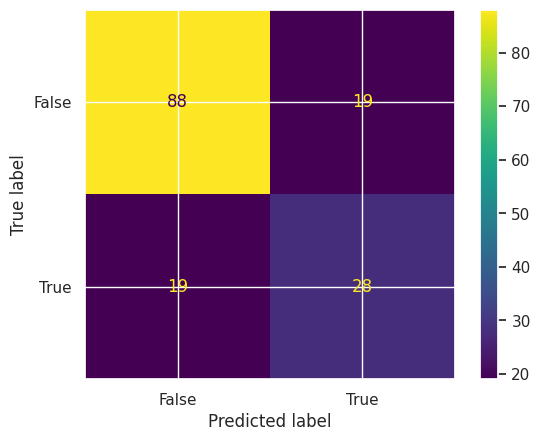

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, knn_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

**KNN**: https://www.geeksforgeeks.org/k-nearest-neighbours/

**Confusion Matrix**: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/



**Formulas**:

1. Accuracy = [Number of Correct Predictions] / [Number of Total Predictions]
2. Error Rate or RMSE = sqrt[(Σ(Pi – Oi)²) / n]

Here, Pi denotes the predicted value, Oi represents the observed value, and n is the total number of observations or data points. The sum of the squared differences between the predicted and observed values is divided by the number of observations, and the square root of the result is taken to yield the RMSE.
3. Precision and Recall: https://en.wikipedia.org/wiki/Precision_and_recall
4. F1 score: The formula for the standard F1-score is the harmonic mean of the precision and recall. A perfect model has an F-score of 1.

#B5

 Implement K-Means clustering on sales_data_sample.csv dataset.
Determine the number of clusters using the elbow method.

Dataset: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/datasets/sales_data_sample.csv', encoding='unicode_escape')

In [ ]:
df.head

<bound method NDFrame.head of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0 

In [ ]:
df.info

<bound method DataFrame.info of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \


In [ ]:
#Columns to Remove
to_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE', 'PHONE']
df = df.drop(to_drop, axis=1)

In [ ]:
#Check for null values
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
CITY                   0
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
CITY                 object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [ ]:
#ORDERDATE Should be in date time
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [ ]:
#We need to create some features in order to create cluseters
#Recency: Number of days between customer's latest order and today's date
#Frequency : Number of purchases by the customers
#MonetaryValue : Revenue generated by the customers
import datetime as dt
snapshot_date = df['ORDERDATE'].max() + dt.timedelta(days = 1)
df_RFM = df.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE' : lambda x : (snapshot_date - x.max()).days,
    'ORDERNUMBER' : 'count',
    'SALES' : 'sum'
})

#Rename the columns
df_RFM.rename(columns = {
    'ORDERDATE' : 'Recency',
    'ORDERNUMBER' : 'Frequency',
    'SALES' : 'MonetaryValue'
}, inplace=True)

In [ ]:
df_RFM.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [ ]:
# Divide into segments
# We create 4 quartile ranges
df_RFM['M'] = pd.qcut(df_RFM['MonetaryValue'], q = 4, labels = range(1,5))
df_RFM['R'] = pd.qcut(df_RFM['Recency'], q = 4, labels = list(range(4,0,-1)))
df_RFM['F'] = pd.qcut(df_RFM['Frequency'], q = 4, labels = range(1,5))

df_RFM.head()

,Recency,Frequency,MonetaryValue,M,R,F
CUSTOMERNAME,,,,,,
"AV Stores, Co.",196,51,157807.81,4,2,4
Alpha Cognac,65,20,70488.44,2,4,2
Amica Models & Co.,265,26,94117.26,3,1,2
"Anna's Decorations, Ltd",84,46,153996.13,4,3,4
Atelier graphique,188,7,24179.96,1,2,1


In [ ]:
#Create another column for RFM score
df_RFM['RFM_Score'] = df_RFM[['R', 'M', 'F']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,MonetaryValue,M,R,F,RFM_Score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,4,2,4,10
Alpha Cognac,65,20,70488.44,2,4,2,8
Amica Models & Co.,265,26,94117.26,3,1,2,6
"Anna's Decorations, Ltd",84,46,153996.13,4,3,4,11
Atelier graphique,188,7,24179.96,1,2,1,4



We create levels for our Customers RFM Score > 10 : High Value Customers RFM Score < 10 and RFM Score >= 6 : Mid Value Customers RFM Score < 6 : Low Value Customers

In [ ]:
def rfm_level(df):
    if bool(df['RFM_Score'] >= 10):
        return 'High Value Customer'

    elif bool(df['RFM_Score'] < 10) and bool(df['RFM_Score'] >= 6):
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis = 1)
df_RFM.head()

,Recency,Frequency,MonetaryValue,M,R,F,RFM_Score,RFM_Level
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",196,51,157807.81,4,2,4,10,High Value Customer
Alpha Cognac,65,20,70488.44,2,4,2,8,Mid Value Customer
Amica Models & Co.,265,26,94117.26,3,1,2,6,Mid Value Customer
"Anna's Decorations, Ltd",84,46,153996.13,4,3,4,11,High Value Customer
Atelier graphique,188,7,24179.96,1,2,1,4,Low Value Customer


In [ ]:
# Time to perform KMeans
data = df_RFM[['Recency', 'Frequency', 'MonetaryValue']]
data.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [ ]:
# Our data is skewed we must remove it by performing log transformation
data_log = np.log(data)
data_log.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",5.278115,3.931826,11.969133
Alpha Cognac,4.174387,2.995732,11.163204
Amica Models & Co.,5.579730,3.258097,11.452297
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683
Atelier graphique,5.236442,1.945910,10.093279


In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data_normalized, index = data_log.index, columns=data_log.columns)
data_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,92.00,92.00,92.00
mean,0.00,-0.00,0.00
std,1.01,1.01,1.01
min,-3.51,-3.67,-3.82
25%,-0.24,-0.41,-0.39
50%,0.37,0.06,-0.04
75%,0.53,0.45,0.52
max,1.12,4.03,3.92


In [ ]:
#Fit KMeans and use elbow method to choose the number of clusters
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sse = {}

for k in range(1, 21):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_

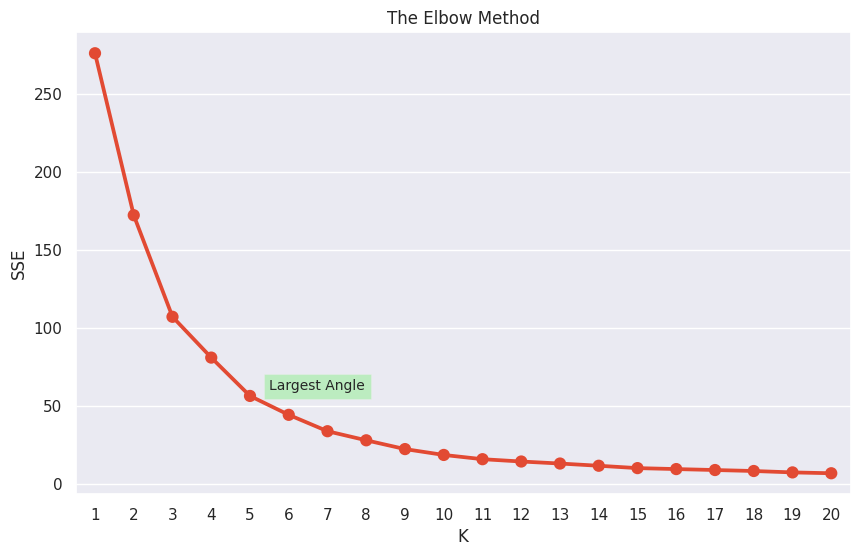

In [ ]:
plt.figure(figsize=(10,6))
plt.title('The Elbow Method')

plt.xlabel('K')
plt.ylabel('SSE')
plt.style.use('ggplot')

sns.pointplot(x=list(sse.keys()), y = list(sse.values()))
plt.text(4.5, 60, "Largest Angle", bbox = dict(facecolor = 'lightgreen', alpha = 0.5))
plt.show()

In [ ]:
# 5 number of clusters seems good
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

data_rfm = data.assign(Cluster = cluster_labels)
data_rfm.head()

,Recency,Frequency,MonetaryValue,Cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",196,51,157807.81,3
Alpha Cognac,65,20,70488.44,0
Amica Models & Co.,265,26,94117.26,0
"Anna's Decorations, Ltd",84,46,153996.13,3
Atelier graphique,188,7,24179.96,2


**K-Means Clustering**: https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning

**Pros and Cons**:https://www.linkedin.com/advice/3/what-advantages-disadvantages-using-k-means#:~:text=K%2Dmeans%20clustering%20is%20a%20widely%20used%20method%20of%20data,efficiently%20and%20parallelized%20or%20distributed.

**Elbow Method**: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/